In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import hydron as hd

In [2]:
dt,tau,X,n,u,T,config = hd.Sod_tube()
#dt,tau,X,n,u,T,config = hd.Boltzmann()
#dt,tau,X,n,u,T,config = hd.Diffusion()

In [3]:
sim = hd.Solver(X,n,u,T,config)

In [4]:
out = sim.run(dt,tau)

in progress...	100% 
done!
Elapsed time: 0.97 seconds


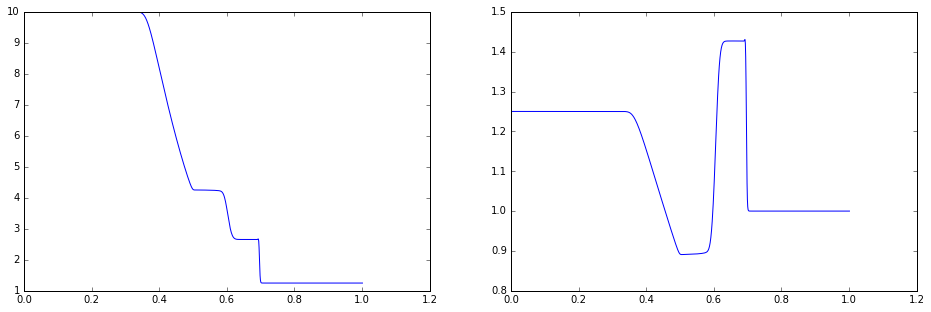

In [5]:
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.plot(sim.x, sim.q[0])
plt.subplot(122)
plt.plot(sim.x, sim.T)

#print np.sum(sim.q0[0]), np.sum(sim.q[0][1:-1]*sim.dxi)

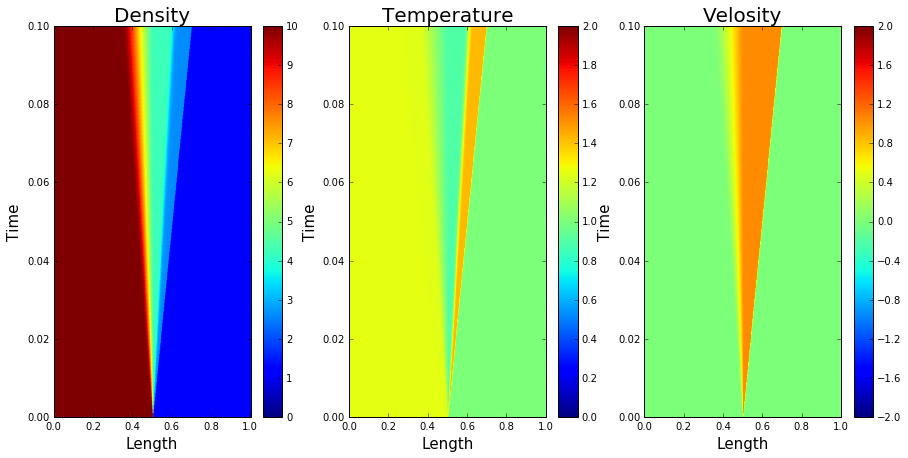

In [6]:
fig = plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title('Density', size = 20)
plt.xlabel('Length', size = 15)
plt.ylabel('Time', size = 15)
plt.imshow(out.n(), vmin = 0, vmax = 10, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,out.L()[-1],0,out.tau()])
plt.colorbar()

plt.subplot(1,3,2)
plt.title('Temperature', size = 20)
plt.xlabel('Length', size = 15)
plt.ylabel('Time', size = 15)
plt.imshow(out.T(), vmin = 0, vmax = 2, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,out.L()[-1],0,out.tau()])
plt.colorbar()

plt.subplot(1,3,3)
plt.title('Velosity', size = 20)
plt.xlabel('Length', size = 15)
plt.ylabel('Time', size = 15)
plt.imshow(out.u(), vmin = -2, vmax = 2,
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,out.L()[-1],0,out.tau()])
plt.colorbar()

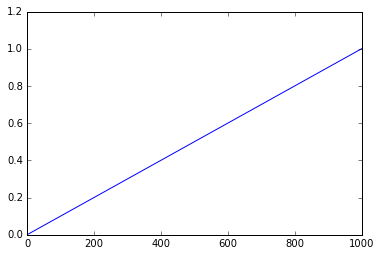

In [7]:
plt.plot(sim.xi[1:])

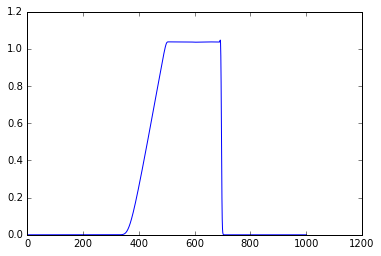

In [8]:
plt.plot(sim.u)

In [9]:
x = np.zeros((1,10))